In [1]:
!pip install librosa

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow
import librosa.display

In [82]:

    ### Let's read a sample audio using librosa
import librosa
audio_file_path="C:\\Users\\ril\\Downloads\\ch_005.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [29]:
import librosa
audio_file_path1="D:\\shravanne-tasks\\new\\genres_original\\pop\\pop.00078.wav"
librosa_audio_data1,librosa_sample_rate1=librosa.load(audio_file_path)

In [14]:
print(librosa_audio_data)

[ 0.4713745   0.42648315  0.41140747 ...  0.03622437 -0.07781982
 -0.12097168]


In [83]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 127)


In [30]:
mfccs1 = librosa.feature.mfcc(y=librosa_audio_data1, sr=librosa_sample_rate1, n_mfcc=40)
print(mfccs1.shape)

(40, 1293)


In [18]:
a=[]
a.append(mfccs)

In [31]:
a.append(mfccs1)

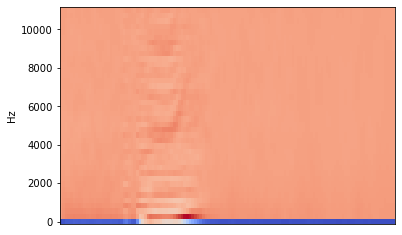

In [84]:
librosa.display.specshow(mfccs, y_axis='linear')

In [32]:
dict={'Mfcc':a}

In [33]:
extracted_features_single= pd.DataFrame(dict)
extracted_features_single.head()

,Mfcc
0,"[[-87.287094, -107.493546, -147.20073, -148.10..."
1,"[[-87.287094, -107.493546, -147.20073, -148.10..."


In [34]:
single_fea1=np.array(extracted_features_single['Mfcc'].tolist())
single_fea1.shape

(2, 40, 1293)

In [39]:
import numpy as np
dataset = []
cla=[]
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'D:\\shravanne-tasks\\new\\genres_original\\{genre}'):
        songname = f'D:\\shravanne-tasks\\new\\genres_original\\{genre}\\{filename}'
        for index in range(14):
            audio, sr = librosa.load(songname,res_type='kaiser_test')
            mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
            fea_class=genre
            dataset.append(mfcc_fea)
            cla.append(fea_class)

In [40]:
d = {'Features':dataset,'class':cla}

In [41]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
2,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
3,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
4,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues


In [42]:
len(dataset)

14000

In [43]:
### Split the dataset into independent and dependent dataset
X=np.array(dataset)
#(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [44]:
X.shape

(14000, 40)

In [45]:
y

array(['blues', 'blues', 'blues', ..., 'rock', 'rock', 'rock'],
      dtype='<U9')

In [46]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [47]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [48]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
X_train

array([[-193.1521    ,   89.18025   ,  -19.990849  , ...,   -0.90498585,
          -1.3640039 ,   -5.928955  ],
       [ -84.05484   ,   63.09341   ,    5.613019  , ...,   -1.0356139 ,
          -1.2826893 ,    0.7403254 ],
       [-201.1977    ,   76.78211   ,  -14.798453  , ...,   -2.1065576 ,
          -1.3161548 ,   -2.4045334 ],
       ...,
       [-125.878746  ,  126.59248   ,  -23.164228  , ...,   -1.461022  ,
          -5.207268  ,   -3.2916818 ],
       [ -52.5842    ,   37.492367  ,   14.0829    , ...,   -3.1213567 ,
          -2.875545  ,   -1.1666998 ],
       [-422.54468   ,   89.863014  ,  -18.732948  , ...,   -4.458441  ,
          -8.296607  ,   -2.824939  ]], dtype=float32)

In [50]:
X_train.shape

(11200, 40)

In [51]:
X_test.shape

(2800, 40)

In [52]:
y_train.shape

(11200, 10)

In [53]:
y_test.shape

(2800, 10)

In [55]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4,1))
X_test=np.reshape(X_test,(X_test.shape[0],10,4,1))

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [57]:
import tensorflow.keras.layers as layers
import IPython.display as ipd

In [58]:
INPUTSHAPE = (10,4,1)

In [67]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.GlobalAveragePooling2D(),
                          layers.Flatten(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 8, 2, 32)          320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               66048     
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 71,498
Trainable params: 71,498
Non-trainable params: 0
__________________________________________________

In [68]:
import tensorflow as tf

In [69]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
1400/1400 [==============================] - 25s 13ms/step - loss: 1.0204 - acc: 0.6581 - val_loss: 0.5711 - val_acc: 0.7993
Epoch 2/40
1400/1400 [==============================] - 14s 10ms/step - loss: 0.3387 - acc: 0.8934 - val_loss: 0.1990 - val_acc: 0.9361
Epoch 3/40
1400/1400 [==============================] - 13s 10ms/step - loss: 0.1109 - acc: 0.9698 - val_loss: 0.0759 - val_acc: 0.9804
Epoch 4/40
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0795 - acc: 0.9772 - val_loss: 0.0750 - val_acc: 0.9768
Epoch 5/40
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0652 - acc: 0.9788 - val_loss: 0.0715 - val_acc: 0.9811
Epoch 6/40
1400/1400 [==============================] - 10s 7ms/step - loss: 0.0151 - acc: 0.9966 - val_loss: 0.0065 - val_acc: 0.9982
Epoch 7/40
1400/1400 [==============================] - 14s 10ms/step - loss: 0.0645 - acc: 0.9805 - val_loss: 0.0063 - val_acc: 0.9982
Epoch 8/40
1400/1400 [=============================

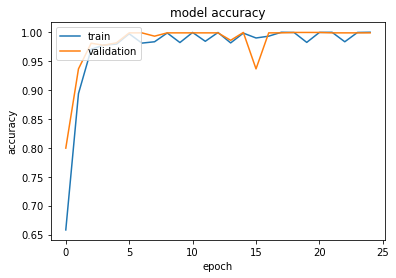

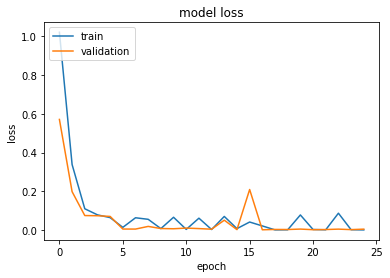

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9982143044471741


In [72]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [73]:
y_pred=model.predict(X_test)

88/88 [==============================] - 2s 9ms/step


In [74]:
round_off=np.round_(y_pred)

Confusion Matrix
[[271   0   0   0   0   0   0   0   0   0]
 [  0 253   0   0   0   0   0   0   0   0]
 [  0   0 273   0   0   0   0   0   0   0]
 [  0   0   0 274   0   0   0   0   0   0]
 [  0   0   0   0 276   0   0   0   0   0]
 [  0   0   0   0   0 296   0   0   0   0]
 [  0   0   0   0   0   0 286   0   0   5]
 [  0   0   0   0   0   0   0 297   0   0]
 [  0   0   0   0   0   0   0   0 296   0]
 [  0   0   0   0   0   0   0   0   0 273]]


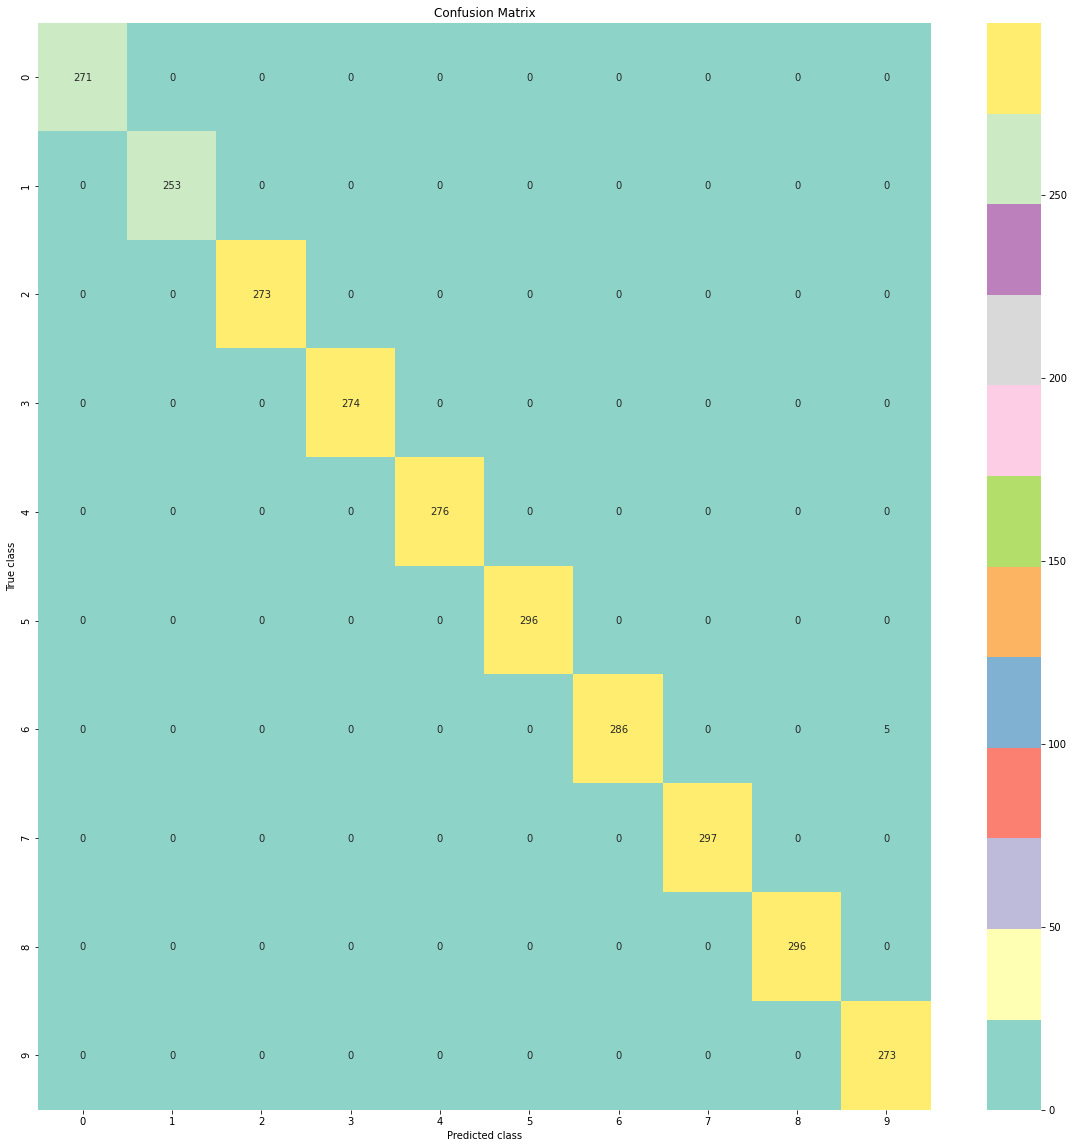

In [75]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [110]:
mydict = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
import librosa
audio_file_path="D:\\shravanne-tasks\\new\\genres_original\\hiphop\\hiphop.00009.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4,1))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 0s 163ms/step
hiphop
